In [4]:
import numpy as np


In [75]:
A = np.matrix([[8,1,6],[3,5,7],[4,9,2]])
N = A.shape[0]
d = A.shape[1]
print(A)

[[8 1 6]
 [3 5 7]
 [4 9 2]]


In [76]:
A_ave = (1/N)*np.ones((N,N))*A
print(A_ave)

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


In [77]:
B = A - A_ave
print(B)

[[ 3. -4.  1.]
 [-2.  0.  2.]
 [-1.  4. -3.]]


In [78]:
# C = (1/(N-1)) * np.transpose(B) * B
# C = (1/(N-1)) * np.transpose(A) * (np.identity(N)-(1/N)*np.ones((N,N))) * B
C = (1/(N-1)) * np.transpose(A) * (np.identity(N)-(1/N)*np.ones((N,N))) * (np.identity(N)-(1/N)*np.ones((N,N))) * A
print(C)

[[ 7. -8.  1.]
 [-8. 16. -8.]
 [ 1. -8.  7.]]


In [79]:
D = (1/(N-1)) * np.transpose(A) * (np.identity(N)-(1/N)*np.ones((N,N))) * A
print(D)

[[ 7. -8.  1.]
 [-8. 16. -8.]
 [ 1. -8.  7.]]


In [80]:
print(np.isclose(C,D))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [83]:
def mean_center(X):
    N = X.shape[0]
    return X - (1/N)*np.ones((N,N))*X

In [86]:
A_mc = mean_center(A)
print(A_mc)

[[ 3. -4.  1.]
 [-2.  0.  2.]
 [-1.  4. -3.]]


In [65]:
def STD_normalize(X):
    N = X.shape[0]
    return np.divide(X, np.sqrt((1/(N-1))*))

SyntaxError: invalid syntax (<ipython-input-65-2eddd45211ce>, line 3)

In [71]:
f = 18
M = 20
c = 5
m = M-c

ff = (f-m)/(M-m)
print(ff)
fff = 1 - ((M-f)/c)
print(fff)

0.6
0.6


In [19]:
from scipy.special import comb as choose


def check(P): # assert laws of probability
    for p in P:
        assert 0.0 <= p <= 1.0
    if len(P) > 1:
        assert sum(P) == 1.0

        
def binomial(p, x, N): 
    return choose(N,x)*(p**x)*((1-p)**(N-x))

print(binomial(0.5, 2, 2))


0.25


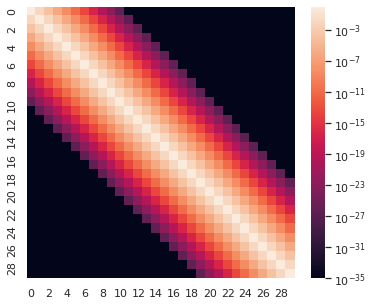

In [72]:
import math


N = 100      # population size for simulation
Gens = 100000 # number of generations the simulation runs for
lg = 10       # length of genome

pm = 0.005    # probability to mutate a site
check([pm])


pm_p1 = 0.5   # probability a mutation increases site value by 1
pm_m1 = 0.5   # probability a mutation decreases site value by 1
check([pm_p1, pm_m1])

p_inc = pm*pm_p1 # probability that a mutation hits and it is positive
check([p_inc])

p_dec = pm*pm_m1
check([p_dec])


for x in range(lg):
    check([binomial(p_inc,x,lg)])# probability for a genome to increase by x positive mutations

for x in range(lg):
    check([binomial(p_dec,x,lg)])# probability for a genome to decrease by x positive mutations

def Fa(x):
    return x

def Fb(x):
    return -0.1*x
#     return 0

def C(x, la, lb):
    ca = 0
    cb = 0
    while x >= la+lb:
        ca += 1
        cb += 1
        x -= la+lb
    if x >= la:
        ca += 1
        x -= la
    return ca, cb, x

def F(x):
    x /= lg # convert fitness function to units of mutational step sizes
    x += 2 # add offset so that x=0 gives fitness at the top of the first peak f(0)=2
    la = 2
    lb = 1.5
    ca, cb, d = C(x, la, lb)
    if ca == cb:
        return Fa(ca*la + d) + Fb(cb*lb)
    else:
        return Fa(ca*la) + Fb(cb*lb + d)
    
def p_i2j(i,j,p_m,p_up,lg,alpha):
    d = j-i
    ad = abs(d)
    p = 0
    for x in range(alpha):
        if d >= 0:
            pp = p_up
        else:
            pp = 1 - p_up #for negative changes just recontextualize "success" as a down-mutation
        #format is Probability to see ad+2x mutations * probability that they exactly add up to d
        p += binomial(p_m, ad+2*x, lg) * binomial(pp, ad+x, ad+2*x)
    return p

# for i in range(40):
#     print(F(i))


def p_sel(x):
    C = 1 # -------------------------------------------------- C
    Fx = F(x)
    MAX = max(F(0),Fx)
    if Fx >= MAX-C:
        return 1-np.power(1-(1/N)*(1-((MAX-Fx)/C)),N)
    else:
        return 0

# def p_sel(x):
#     Fx = F(x)
#     MAX = max(F(0),Fx)
#     MIN = min(F(0),Fx)-1e-15# min element of population gets remapped to 0, therefore we lower the min a bit
#     if MAX==MIN:
#         part = 1/N
#     else:
#         part = (1/N)*(Fx-MIN)/(MAX-MIN)
#     return 1-np.power(1-part,N)

# def p_sel(x):
#     total = (N-1)*np.exp(F(0)) + np.exp(F(x))
#     part =  np.exp(F(x)) / total
#     return 1-np.power(1-part,N)
    
for i in range(40):
#     print(i, p_sel(i))
    check([p_sel(i)]) #probabilities to be selected given that the population is at x=0 and the agent is at x; based on max-c selection model

    
    
    
    
    
    
    
    
    

# generate markov model for evolution of 1 trait
param = 30 #larger than 15 --------------------------------- param
P = np.zeros((param,param))

for i in range(param):
    for j in range(param):
#         P[i][j] = p_sel(i)*p_i2j(i,j,pm,pm_p1,lg,30)
        if i != j:
            P[i][j] = p_sel(i)*p_i2j(i,j,pm,pm_p1,lg,30)
        else:
            P[i][j] = 1-p_sel(i) + p_sel(i)*p_i2j(i,j,pm,pm_p1,lg,30) #im not sure about the first term in this sum
        check([P[i][j]])
# print(P)

plt.figure(figsize=(6,5))
ax = sns.heatmap(np.add(P,1e-35),norm=LogNorm(vmin=0, vmax=1))
ax.set_ylim([param,0]) # fixes seaborn axes
plt.show() 

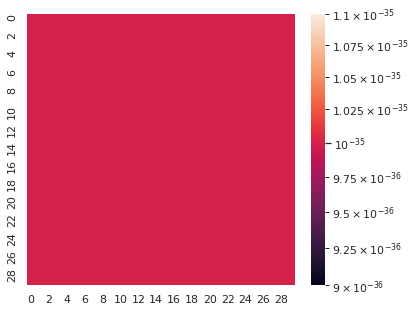

DONE


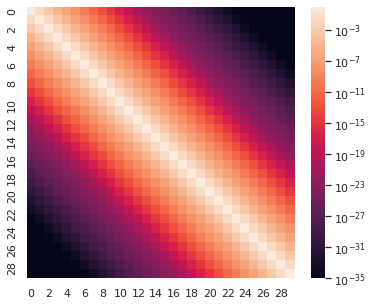

P(0->15)  3.456412379864175e-25


In [60]:
import pathlib
import csv

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from copy import deepcopy
from matplotlib.colors import LogNorm
depth = 25

# generate steady-state probabilities
plt.figure(figsize=(6,5))
XX = deepcopy(P)
for _ in range(depth):
#     ax = sns.heatmap(np.add(XX,1e-35),norm=LogNorm(vmin=0, vmax=1))
#     ax.set_ylim([param,0]) # fixes seaborn axes
#     plt.show()
    XX = np.dot(XX,XX)
ax = sns.heatmap(np.add(XX,1e-35),norm=LogNorm(vmin=0, vmax=1))
ax.set_ylim([param,0]) # fixes seaborn axes
plt.show()    


#generate probabilities for future passage
def FirstPassageTime(P,n):
    F = deepcopy(P)
    FF = deepcopy(P)
    for _ in range(n):
        for i in range(len(P)):
            for j in range(len(P)):
                s = 0
                for k in range(len(P)):
                    if k != j:
                        s += P[i][k]*F[k][j]
                FF[i][j] = s
        F = deepcopy(FF)
    return F

plt.figure(figsize=(6,5))
XX = deepcopy(P)
YY = np.zeros(XX.shape)

for n in range(depth):
    XX = FirstPassageTime(XX,n)
    YY = np.add(XX,YY)
#     ax = sns.heatmap(np.add(XX,1e-35),norm=LogNorm(vmin=0, vmax=1))
#     ax.set_ylim([param,0]) # fixes seaborn axes
#     print("n =",n)
#     plt.show()
print("DONE")
ax = sns.heatmap(np.add(YY,1e-35),norm=LogNorm(vmin=0, vmax=1))
ax.set_ylim([param,0]) # fixes seaborn axes
plt.show()   
print("P(0->15) ", YY[0][15])

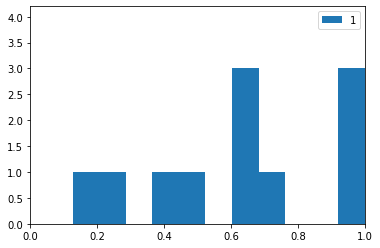

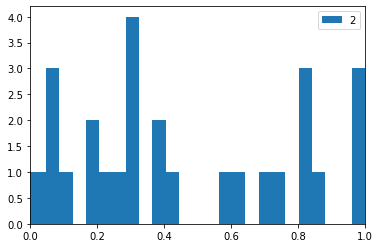

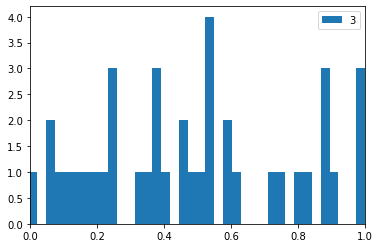

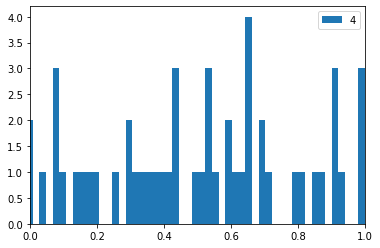

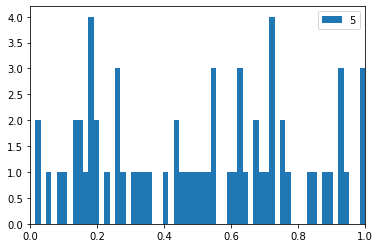

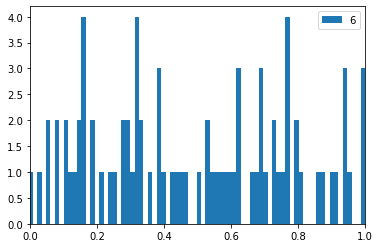

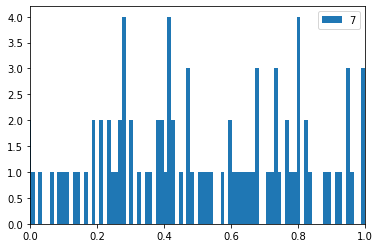

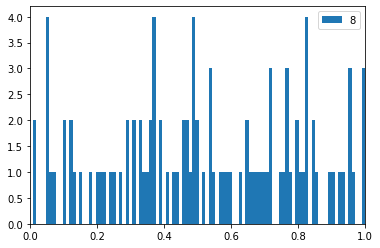

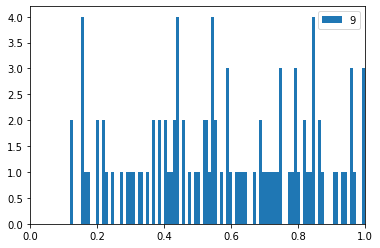

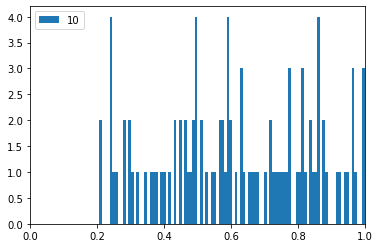

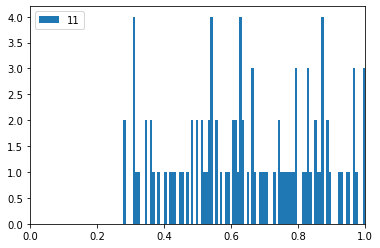

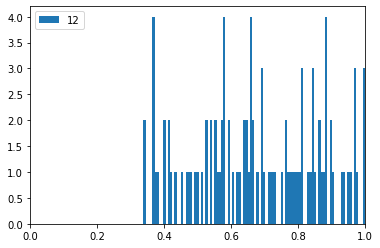

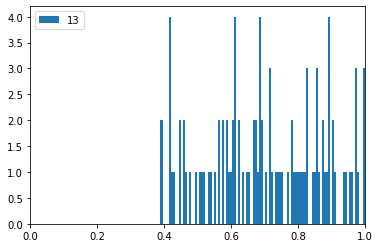

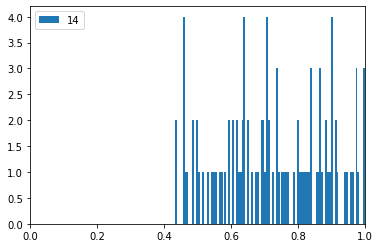

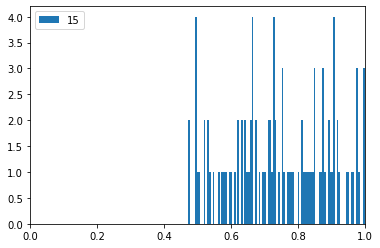

In [27]:
import random
import matplotlib.pyplot as plt
fitness = [(random.random()*8) for _ in range(100)]
m = max(fitness)

for C in range(1,16):
    remap = [1-((m-f)/C) for f in fitness]
    plt.hist(remap, label=C,bins=100)
    plt.xlim(0,1)
    plt.legend()
    plt.show()